# <p style="text-align: center;">Botnet Detection in IoT Environment</p>





# Abstract

The goal of this project is to use classification models for botnet detection in IoT environment in order to improve the IoT network security. In addtion, leveraging categorical feature engineering along with a supervised learning algorithms, logistic Regression, Decision Tree and Random Forest to achieve promising results for this problem. 

BoT-IoT dataset is going to be used in this project. The BoT-IoT dataset was created by designing a realistic network environment in the Cyber Range Lab of UNSW Canberra. The network environment incorporated a combination of normal and botnet traffic. Further information can be found at https://research.unsw.edu.au/projects/bot-iot-dataset 

Such this model can be integrated with current IoT network detection solutions in order to improve their accuracy to mitigate the threats.

# Design

As such a project and precisely botnet detection in IoT environment, it requires a dataset containing enough information about IoT traces. BoT-IoT dataset was created in the lab of UNSW Canberra cyber center. This dataset collaborates the normal and botnet traffic with labels. The researcher creates many virtual machines on an internal network to simulate different malicious attacks with the intention to capture normal and malicious traffic as shown in the figure below.

<img src="https://github.com/SaeedQahtani/T5-Project-/blob/main/Design.PNG" alt="Drawing" style="width: 600px;"/>



# Description of the Dataset
More than 72 million records were captured to create BoT-IoT dataset. The dataset includes traffic from different malicious attacks. The major contrast in this dataset is that it contains more than 99% of botnet traffic while less than 1% normal traffic. In spite of that, 81789 records were taken as balanced sample of the whole data to do the experiments and build the models. In this study, 15 features were selected including the target.

### Selected features:

| Feature| Description|
| --- | --- |
| dur | Record total duration |
| spkts | Source-to-destination packet count |
| dpkts | Destination-to-source packet count |
| Sbytes | Source-to-destination byte count |
| Dbytes | Destination-to-source byte count |
| rate | Total packets per second in transaction |
| sttl | Source to destination time to live value |
| dttl | Destination to source time to live value |
| sload | Source bits per second |
| dload | Destination bits per second |
| sinpkt | Source interpacket arrival time (mSec) |
| dinpkt | Destination interpacket arrival time (mSec) |
| sjit | Source jitter (mSec) |
| djit | Destination jitter (mSec) |
| label | Class label: 0 for Normal traffic, 1 for Attack Traffic |



# Model Selection and Evaluation 

##  A- Models Selection

In this project, I will implement a three machine learning methods:

- Logistic Regression
- Decision Trees
- Random Forest



##  B- Models Evaluation

I will evaluate these three models by calculating accuracy, precision, recall, and f1score after training and testing them as in following steps. In addition, feature importance ranking will be considered in the evalution process of selected models.


### Step 1: Importing Libraries

In this project, I will used many important libraries such as:
- Numpy and Pandas for data manipulation
- Scikit-learn for modeling
- Matplotlib and Seaborn for plotting

### Step 2: Importing the dataset

After importing needed Libraries, I will import the dataset using the following:

In [55]:
Traffic_Data = pd.read_csv('Dataset/IoT-Bot.csv')

### Step 3: Feature Engineering

Then, I will do some feature engineering processes:

1- Clean the data by dropping features that consist of frequent missing or unuseful data such as time and source/destination address...etc.

2- Converting categorical features to binary dummy variables as needed.



### Look at the first 5 rows

In [56]:
Traffic_Data.shape

(81789, 15)

In [57]:
Traffic_Data.head(n=5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,0


### Check if there are Null values


In [58]:
Traffic_Data.isnull().sum()

dur       0
spkts     0
dpkts     0
sbytes    0
dbytes    0
rate      0
sttl      0
dttl      0
sload     0
dload     0
sinpkt    0
dinpkt    0
sjit      0
djit      0
label     0
dtype: int64

In [59]:
Traffic_Data.isnull()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81784,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81785,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81786,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81787,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Describing our Dataset by calculating statistics of features

In [60]:
Traffic_Data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,label
count,81789.000000,81789.000000,81789.000000,8.178900e+04,8.178900e+04,81789.000000,81789.000000,81789.000000,8.178900e+04,8.178900e+04,81789.000000,81789.000000,8.178900e+04,81789.000000,81789.00000
mean,1.496559,38.784837,39.553412,1.838070e+04,3.140203e+04,864.891059,129.465784,166.981465,4.627089e+05,1.239722e+06,122.308043,159.884403,1.054101e+04,1286.209475,0.50574
std,4.850527,198.393341,158.678850,2.555435e+05,2.090596e+05,1842.817659,104.840129,108.097431,1.465706e+06,3.218854e+06,638.991241,1036.868668,6.538014e+04,5843.502702,0.49997
min,0.000707,4.000000,2.000000,1.720000e+02,8.600000e+01,0.166755,29.000000,29.000000,3.716253e+01,3.443121e+01,0.141400,0.000000,1.763610e-01,0.000000,0.00000
25%,0.183746,10.000000,8.000000,7.680000e+02,3.540000e+02,21.917534,31.000000,29.000000,6.854647e+03,3.809489e+03,7.936883,4.941864,4.383056e+02,47.372687,0.00000
50%,0.645266,12.000000,10.000000,1.260000e+03,1.258000e+03,38.617258,62.000000,252.000000,1.697160e+04,1.125449e+04,48.095538,58.525444,2.784772e+03,125.864109,1.00000
75%,1.157620,28.000000,24.000000,3.598000e+03,5.474000e+03,260.333768,254.000000,252.000000,2.988663e+05,3.987141e+05,90.053333,103.783766,5.680521e+03,287.694594,1.00000
max,59.999046,9616.000000,10974.000000,1.296523e+07,1.465555e+07,14457.411160,254.000000,254.000000,2.346233e+07,2.242273e+07,18961.849170,56716.824000,1.460480e+06,289388.269700,1.00000


### Plot the Target value "label"  of our Dataset to see how balance is our Dataset

<AxesSubplot:xlabel='label'>

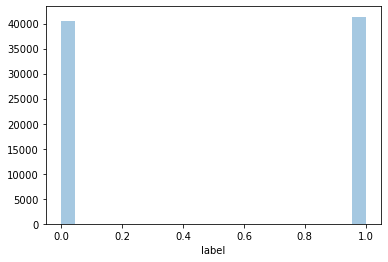

In [61]:
sns.distplot(Traffic_Data['label'],kde = False)

### Count records number based on Target value "label"  of our Dataset 

In [62]:
Traffic_Data['label'].value_counts()

1    41364
0    40425
Name: label, dtype: int64

### Now, it is clear thatour  dataset is a BALANCED dataset  



# Train ML Models

I will train three different models with datasets mentioned earlier and do some measurements such as (accuracy, precision, recall and fscore) to see how efficient are these three models with the project's dataset.

These three models are as following:

## Model 1: Logistic Regression

## Model 2: DecisionTree

## Model 3: RandomForest

# Conclusion

I have to train, test and evaluate these three models and concluded which one was the most accurate for predicting the Botnet type of traffic based on the specified dataset.